In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dfRushing = pd.read_csv('./NFL_Data/2019/2019_NFL_Rushing.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

In [3]:
player_columns = ['Player', 'Tm', 'Age', 'Pos', 'G', 'GS']
rushing_columns = ['Att', 'Yds', 'TD', '1D', 'Lng', 'Y/A', 'Y/G', 'Fmb']

In [4]:
pointsPerRec = 1
pointsPerPassingTD = 4
pointsPerRushingTD = 4
pointsPerReceivingTD = 4
pointsPerRushingYD = 0.1
pointsPerReceivingYd = 0.1
pointsPerPassingYd = 0.04
pointsPerFumble = -2
pointsPerINT = -2

In [5]:
dfRushing['RushingFPs'] = dfRushing['Yds'] * pointsPerRushingYD + dfRushing['TD'] * pointsPerRushingTD + dfRushing['Fmb'] * pointsPerFumble

In [6]:
qb_rushing_df = dfRushing[dfRushing['Pos'] == 'QB']
rb_rushing_df = dfRushing[dfRushing['Pos'] == 'RB']
k_rushing_df = dfRushing[dfRushing['Pos'] == 'K']
wr_rushing_df = dfRushing[dfRushing['Pos'] == 'WR']

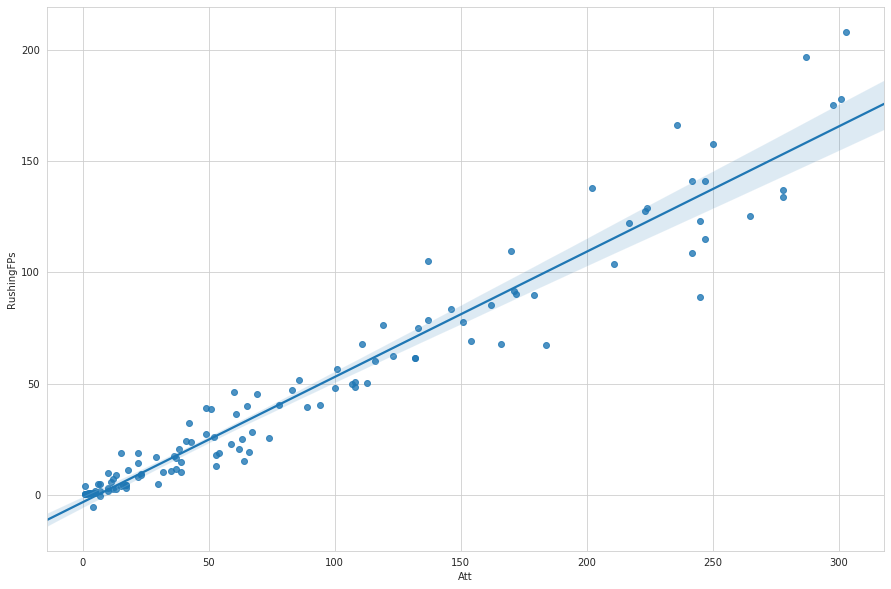

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(
        x = rb_rushing_df['Att'],
        y = rb_rushing_df['RushingFPs'],
        scatter=True,)

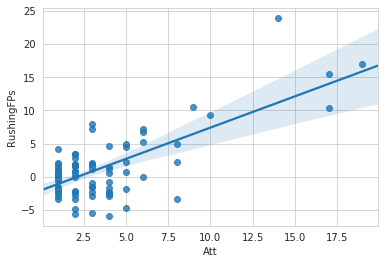

In [8]:
plot = sns.regplot(
        x = wr_rushing_df['Att'],
        y = wr_rushing_df['RushingFPs'],
        scatter=True,)

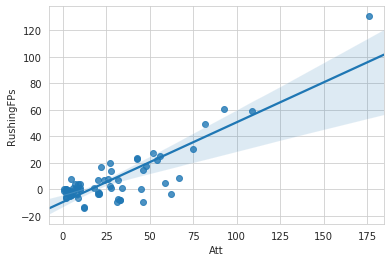

In [9]:
plot = sns.regplot(
        x = qb_rushing_df['Att'],
        y = qb_rushing_df['RushingFPs'],
        scatter=True,)

In [10]:
import statsmodels.api as sm

In [11]:
print(rb_rushing_df.columns.tolist())

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD', '1D', 'Lng', 'Y/A', 'Y/G', 'Fmb', 'RushingFPs']


In [19]:
X = rb_rushing_df[rushing_columns]
XAtt = rb_rushing_df["Att"]
XYds = rb_rushing_df["Yds"]
XTD = rb_rushing_df["TD"]
XFmb = rb_rushing_df["Fmb"]

X = X.apply(pd.to_numeric)
XAtt = XAtt.apply(pd.to_numeric)
XYds = XYds.apply(pd.to_numeric)
XTD = XTD.apply(pd.to_numeric)
XFmb = XFmb.apply(pd.to_numeric)

In [20]:
Y = rb_rushing_df["RushingFPs"]

In [21]:
modelA = sm.OLS(Y, X).fit()

predictions = modelA.predict(X)

modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             RushingFPs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.385e+32
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                        0.00
Time:                        14:15:15   Log-Likelihood:                          3544.6
No. Observations:                 117   AIC:                                     -7073.
Df Residuals:                     109   BIC:                                     -7051.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Att         2.776e-16   1.09e-16      2.556      0.012    6.24e-17    4.93e-16
Yds            0.1000   3.17e-17   3.16e+15      0.000       0.100       0.100
TD             4.0000   8.66e-16   4.62e+15      0.000       4.000       4.000
1D                  0   3.91e-16          0      1.000   -7.74e-16    7.74e-16
Lng         8.674e-18   1.42e-16      0.061      0.951   -2.72e-16     2.9e-16
Y/A        -2.442e-15   9.61e-16     -2.542      0.012   -4.35e-15   -5.38e-16
Y/G         1.221e-15   2.16e-16      5.646      0.000    7.93e-16    1.65e-15
Fmb           -2.0000   1.51e-15  -1.32e+15      0.000      -2.000      -2.000
==============================================================================
Omnibus:                       16.845   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.159
Skew:                          -0.922   Prob(JB):                     6.91e-05
Kurtosis:                       3.729   Cond. No.                         552.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
modelAtt = sm.OLS(Y, XAtt).fit()

predictions = modelAtt.predict(XAtt)

modelAtt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             RushingFPs   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              3555.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    7.14e-89
Time:                        14:15:16   Log-Likelihood:                         -461.81
No. Observations:                 117   AIC:                                      925.6
Df Residuals:                     116   BIC:                                      928.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Att            0.5441      0.009     59.627      0.000       0.526       0.562
==============================================================================
Omnibus:                       23.053   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.379
Skew:                           0.689   Prob(JB):                     7.74e-14
Kurtosis:                       6.238   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
modelYds = sm.OLS(Y, XYds).fit()

predictions = modelYds.predict(XYds)

modelYds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             RushingFPs   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8743.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                   4.60e-111
Time:                        14:15:16   Log-Likelihood:                         -410.28
No. Observations:                 117   AIC:                                      822.6
Df Residuals:                     116   BIC:                                      825.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds            0.1251      0.001     93.501      0.000       0.122       0.128
==============================================================================
Omnibus:                       15.205   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.771
Skew:                           0.631   Prob(JB):                     1.14e-05
Kurtosis:                       4.754   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
modelTD = sm.OLS(Y, XTD).fit()

predictions = modelTD.predict(XTD)

modelTD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             RushingFPs   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              947.3
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    1.22e-57
Time:                        14:15:17   Log-Likelihood:                         -534.30
No. Observations:                 117   AIC:                                      1071.
Df Residuals:                     116   BIC:                                      1073.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TD            14.4143      0.468     30.778      0.000      13.487      15.342
==============================================================================
Omnibus:                        6.308   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                8.465
Skew:                           0.239   Prob(JB):                       0.0145
Kurtosis:                       4.228   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
modelFmb = sm.OLS(Y, XFmb).fit()

predictions = modelFmb.predict(XFmb)

modelFmb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             RushingFPs   R-squared (uncentered):                   0.534
Model:                            OLS   Adj. R-squared (uncentered):              0.530
Method:                 Least Squares   F-statistic:                              132.8
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    5.98e-21
Time:                        14:15:17   Log-Likelihood:                         -619.26
No. Observations:                 117   AIC:                                      1241.
Df Residuals:                     116   BIC:                                      1243.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fmb           29.3219      2.544     11.526      0.000      24.283      34.361
==============================================================================
Omnibus:                       10.805   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.442
Skew:                           0.491   Prob(JB):                     0.000731
Kurtosis:                       4.413   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""